# **Exploratory Data Analysis: Financial Inclusion**

# 1) Defining the question

# a) Specifying the question

How we can predict which individuals are most likely to have or use a bank account in Kenya, Rwanda, Tanzania, and Uganda?

# b)Defining the metric of success

The project will be considered successful if we are able to predict individuals that are most likely to have or use a bank account and advise banks so as to increase the number of people with accounts hence financial inclusion.




# c)Understanding the question

Financial Inclusion means that businesses and individuals are able to access financial products and services. This remains to be one of the main obstacles to economic and human development in Africa. Access to bank accounts is imperative as it enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. This is a great contributor to the economic growth. We have been tasked to determine how we can predict the individuals that are most likely to have or use a bank account account in the four selected countries that is Kenya, Rwanda, Tanzania and Uganda.Our solution will help provide an indication of the state of financial inclusion in the four countries while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes. Below are the various variables in our dataset;


*   Country-Country the interview is in.

*  Cell phone access-If interviewee has access to a cell phone ie either Yes or No.
*   Age of respondent-The age of the interviewee.

*   Marital status-The marital status of the interviewee.
*   Education level-Highest level of education of the interviewee.

*   Uniqueid-Unique identifier for each interviewee.

*  Year-Year survey was done.
*   Location tye-Type of location ie either rural or urban.


*   Gender of respondent-Gender of interviewee ie either Male or Female.
*   Relationship with head-The interviewee’s relationship with the head of the house.


*   Job type-Type of job interviewee has.


# d) Recording the experimental design

*   Defining the question.
*   Finding and dealing with outliers, anomalies, and missing data within the dataset.
*   Performing univariate, bivariate and multivariate analysis and recording our observations.
*  Implementing the solution by performing principal component analysis.
*   Challenging our solution by providing insights on how we can make improvements.

 

# e)Data Relevance

The data set is relevant for the analysis process.It contains demographic information and what financial services are used by individuals across East Africa. The data was extracted from various Finscope surveys ranging from 2016 to 2018.

# 2) Reading the data

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading the data from the source
#dataset url= /content/Financial Dataset - 1.csv
df=pd.read_csv("/content/Financial Dataset - 1.csv")
#Previewing the top of our dataset
df.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# 3) Checking the Data

In [ ]:
# Previewing the bottom of our dataset
df.tail(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
#Checking the number of records in our dataset
df.count()

country                   23510
year                      23524
uniqueid                  23524
Has a Bank account        23488
Type of Location          23509
Cell Phone Access         23513
household_size            23496
Respondent Age            23490
gender_of_respondent      23490
The relathip with head    23520
marital_status            23492
Level of Educuation       23495
Type of Job               23494
dtype: int64

The number of records in the columns are different indicating presence of null values.

In [ ]:
# Checking for more information about our columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
#Checking our columns
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
# Renaming columns for uniformity

df.columns = ['country', 'year', 'uniqueid', 'has_a_bank_account', 'location_type', 
                   'has_a_cell_phone', 'household_size', 'respondent_age', 'respondent_gender',
                   'relationship_with_head', 'marital_status', 'education_level', 'occupation']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   has_a_bank_account      23488 non-null  object 
 4   location_type           23509 non-null  object 
 5   has_a_cell_phone        23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   respondent_age          23490 non-null  float64
 8   respondent_gender       23490 non-null  object 
 9   relationship_with_head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  education_level         23495 non-null  object 
 12  occupation              23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
#Checking unique values
df.nunique()

country                      4
year                         6
uniqueid                  8735
has_a_bank_account           2
location_type                2
has_a_cell_phone             2
household_size              21
respondent_age              85
respondent_gender            2
relationship_with_head       6
marital_status               5
education_level              7
occupation                  10
dtype: int64

# 4)Tidying the Dataset

In [ ]:
#checking for missing values
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
location_type             15
has_a_cell_phone          11
household_size            28
respondent_age            34
respondent_gender         34
relationship_with_head     4
marital_status            32
education_level           29
occupation                30
dtype: int64

In [ ]:
#dropping the missing values
df = df.dropna()
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
has_a_bank_account        0
location_type             0
has_a_cell_phone          0
household_size            0
respondent_age            0
respondent_gender         0
relationship_with_head    0
marital_status            0
education_level           0
occupation                0
dtype: int64

In [ ]:
#Checking for duplicates
df.duplicated().sum()

0

Our dataset does not have duplicates

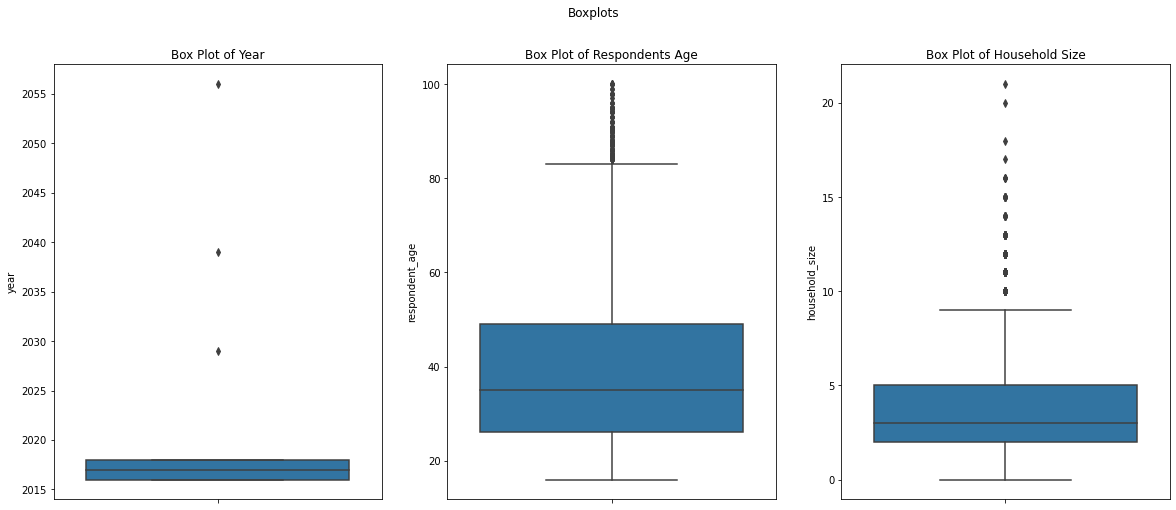

In [ ]:
#Checking for outliers/anomalies

fig, ax = plt.subplots(1,3, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=df, y ='year', ax=ax[0])
ax[0].set_title('Box Plot of Year')
sns.boxplot(data=df, y ='respondent_age', ax=ax[1])
ax[1].set_title('Box Plot of Respondents Age')
sns.boxplot(data=df, y = "household_size", ax=ax[2])
ax[2].set_title('Box Plot of Household Size')


plt.show()

# The plots below show that we have three outliers in the 'year' variable, eleven outliers in 'household size' variable and multiple outliers in the 'age' variable.

In [ ]:
#Detecting outliers on years variable
outliers = []

def detect_outlier(data):
  threshold=3
  mean_1=np.mean(data)
  std_1=np.std(data)

  for y in data:
    z_score=(y-mean_1)/std_1
    if np.abs(z_score)>threshold:
      outliers.append(y)
  return outliers
detect_outlier(df['year'])

[2029, 2056, 2039]

The year column clearly contains outliers since there's the entry of years not included in the study. i.e. 2029,2039,2056.

We must exclude those entries.

In [ ]:
#Removing outliers in year variable using Interquartile Range
for x in ['year']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [ ]:
#Checking for null values
df.isnull().sum()

country                   0
year                      3
uniqueid                  0
has_a_bank_account        0
location_type             0
has_a_cell_phone          0
household_size            0
respondent_age            0
respondent_gender         0
relationship_with_head    0
marital_status            0
education_level           0
occupation                0
dtype: int64

In [ ]:
#Dropping the null values in year variable
df=df.dropna(axis=0)

#Checking for null valies
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
has_a_bank_account        0
location_type             0
has_a_cell_phone          0
household_size            0
respondent_age            0
respondent_gender         0
relationship_with_head    0
marital_status            0
education_level           0
occupation                0
dtype: int64

The dataset has no null values meaning the outliers in variable year have been removed. We will not remove the outliers in the respondent age and household size variable as they are of interest to our analysis.

# **Univariate Analysis**

# Measures of Central Tendency

Checking for Mean,Median and Mode for  numerical variables Respondent Age and Household_size for Kenya, Uganda, Tanzania and Rwanda.


In [ ]:
#Checking for Mean,Median and Mode for Household size where Coutry=Kenya

df_kenya=df[df['country']=='Kenya']
mean_household=df_kenya["household_size"].mean()
median_household=df_kenya["household_size"].median()
mode_household=df_kenya["household_size"].mode()
print ('Mean', mean_household)
print('Median', median_household)
print('Mode', mode_household) 

Mean 3.9871329594193337
Median 4.0
Mode 0    1.0
dtype: float64


In Kenya, the average number of household size is 4 and most of the households have one member. 

In [ ]:
#Checking for Mean,Median and Mode for Household size where Coutry=Rwanda

df_rwanda=df[df['country']=='Rwanda']
mean_household=df_rwanda["household_size"].mean()
median_household=df_rwanda["household_size"].median()
mode_household=df_rwanda["household_size"].mode()
print ('Mean', mean_household)
print('Median', median_household)
print('Mode', mode_household) 

Mean 4.482782448462513
Median 4.0
Mode 0    4.0
dtype: float64



In Rwanda, the average number of household size is 4 and most of the households consist of four members. The median is 4.

In [ ]:
#Checking for Mean,Median and Mode for Household size where Coutry=Tanzania

df_tanzania=df[df['country']=='Tanzania']
mean_household=df_tanzania["household_size"].mean()
median_household=df_tanzania["household_size"].median()
mode_household=df_tanzania["household_size"].mode()
print ('Mean', mean_household)
print('Median', median_household)
print('Mode', mode_household) 

Mean 1.9316923076923076
Median 2.0
Mode 0    2.0
dtype: float64


In Tanzania, the average number of household size is 2 and most of the households consist of 2 members. 


In [ ]:
#Checking for Mean,Median and Mode for Household size where Coutry=Uganda

df_uganda=df[df['country']=='Uganda']
mean_household=df_uganda["household_size"].mean()
median_household=df_uganda["household_size"].median()
mode_household=df_uganda["household_size"].mode()
print ('Mean', mean_household)
print('Median', median_household)
print('Mode', mode_household)  


Mean 4.983770883054893
Median 5.0
Mode 0    3.0
dtype: float64


In Uganda, the average number of household size is 5 and most of the households consist of 3 members. The median is 5.


Checking for Mean,Median and Mode for Respondent age in the four countries

In [ ]:
#Checking for Mean,Median and Mode for Respondent age where Coutry=Kenya
mean_age=df_kenya['respondent_age'].mean()
median_age=df_kenya["respondent_age"].median()
mode_age=df_kenya["respondent_age"].mode()
print ('Mean', mean_age)
print('Median', median_age)
print('Mode', mode_age)  


Mean 39.62405146816232
Median 35.0
Mode 0    30.0
dtype: float64


In Kenya, the average age of the respondents is 39.6 years and majority of the respondents are aged 30 years. The median for respondent age is 35 years.


In [ ]:
#Checking for Mean,Median and Mode for Respondent age where Coutry=Rwanda
mean_age=df_rwanda['respondent_age'].mean()
median_age=df_rwanda["respondent_age"].median()
mode_age=df_rwanda["respondent_age"].mode()
print ('Mean', mean_age)
print('Median', median_age)
print('Mode', mode_age)  

Mean 39.278360013820105
Median 35.0
Mode 0    30.0
dtype: float64


In Rwanda, the average age of the respondents is 39.2 years and majority of the respondents are aged 30 years.The median for respondent age is 35 years.

In [ ]:
#Checking for Mean,Median and Mode for Respondent age where Coutry=Tanzania

mean_age=df_tanzania['respondent_age'].mean()
median_age=df_tanzania["respondent_age"].median()
mode_age=df_tanzania["respondent_age"].mode()
print ('Mean', mean_age)
print('Median', median_age)
print('Mode', mode_age)  

Mean 38.482461538461536
Median 35.0
Mode 0    30.0
dtype: float64


In Tanzania, the average age of the respondents is 38.4 years and majority of the respondents are aged 30 years. The median for respondent age is 35 years.

In [ ]:
#Checking for Mean,Median and Mode for Respondent age where Coutry=Uganda

mean_age=df_uganda['respondent_age'].mean()
median_age=df_uganda["respondent_age"].median()
mode_age=df_uganda["respondent_age"].mode()
print ('Mean', mean_age)
print('Median', median_age)
print('Mode', mode_age)  

Mean 35.49689737470167
Median 31.0
Mode 0    30.0
dtype: float64


In Uganda, the average age of the respondents is 35.5 years and majority of the respondents are aged 30 years. The median for respondent age is 31 years.

# Measures of Dispersion
Checking the measures of dispersion of the respondent age and household variable.



In [ ]:
# Checking the various measures of dispersion for the age variable
# standard deviation, variance, range, interquatile range, skewness and kurtosis for Kenya
age_std = df_kenya['respondent_age'].std()
age_var = df_kenya['respondent_age'].var()

age_max = df_kenya['respondent_age'].max()
age_min = df_kenya['respondent_age'].min()
age_range = age_max - age_min

age_skew = df_kenya['respondent_age'].skew()
age_kurt = df_kenya['respondent_age'].kurt()


print('Standard Deviation of Age variable is ' + str(age_std))
print('Variance of Age variable is ' + str(age_var))
print('Range of Age variable is ' + str(age_range))
print('Skewness of Age variable is ' + str(age_skew))
print('Kurtosis of Age variable is ' + str(age_kurt))

Standard Deviation of Age variable is 17.215858390394672
Variance of Age variable is 296.3857801181227
Range of Age variable is 79.0
Skewness of Age variable is 0.7847895729865458
Kurtosis of Age variable is -0.09853584676475435


Kurtosis is -0.0985 Meaning the kurtosis is platykurtic, the tail in this distribution is thinner



Our respondents age range is 79 in Kenya.

In [ ]:
# Checking the various measures of dispersion for the age variable
# standard deviation, variance, range, interquatile range, skewness and kurtosis for Uganda
age_std = df_uganda['respondent_age'].std()
age_var = df_uganda['respondent_age'].var()

age_max = df_uganda['respondent_age'].max()
age_min =df_uganda['respondent_age'].min()
age_range = age_max - age_min

age_skew = df_uganda['respondent_age'].skew()
age_kurt = df_uganda['respondent_age'].kurt()


print('Standard Deviation of Age variable is ' + str(age_std))
print('Variance of Age variable is ' + str(age_var))
print('Range of Age variable is ' + str(age_range))
print('Skewness of Age variable is ' + str(age_skew))
print('Kurtosis of Age variable is ' + str(age_kurt))

Standard Deviation of Age variable is 15.304232951802735
Variance of Age variable is 234.21954624304465
Range of Age variable is 82.0
Skewness of Age variable is 1.02065646469059
Kurtosis of Age variable is 0.5208185808775485


Our respondents age range is 82 in Uganda.

In [ ]:
# Checking the various measures of dispersion for the age variable
# standard deviation, variance, range, interquatile range, skewness and kurtosis for Rwanda
age_std = df_rwanda['respondent_age'].std()
age_var = df_rwanda['respondent_age'].var()

age_max = df_rwanda['respondent_age'].max()
age_min =df_rwanda['respondent_age'].min()
age_range = age_max - age_min

age_skew = df_rwanda['respondent_age'].skew()
age_kurt = df_rwanda['respondent_age'].kurt()


print('Standard Deviation of Age variable is ' + str(age_std))
print('Variance of Age variable is ' + str(age_var))
print('Range of Age variable is ' + str(age_range))
print('Skewness of Age variable is ' + str(age_skew))
print('Kurtosis of Age variable is ' + str(age_kurt))

Standard Deviation of Age variable is 16.26209331107671
Variance of Age variable is 264.4556788581659
Range of Age variable is 83.0
Skewness of Age variable is 0.7915233976077953
Kurtosis of Age variable is 0.03454498732378086


Our respondents age range is 83 in Rwanda.

In [ ]:
# Checking the various measures of dispersion for the age variable
# standard deviation, variance, range, interquatile range, skewness and kurtosis for Tanzania
age_std = df_tanzania['respondent_age'].std()
age_var = df_tanzania['respondent_age'].var()

age_max = df_tanzania['respondent_age'].max()
age_min =df_tanzania['respondent_age'].min()
age_range = age_max - age_min

age_skew = df_tanzania['respondent_age'].skew()
age_kurt = df_tanzania['respondent_age'].kurt()


print('Standard Deviation of Age variable is ' + str(age_std))
print('Variance of Age variable is ' + str(age_var))
print('Range of Age variable is ' + str(age_range))
print('Skewness of Age variable is ' + str(age_skew))
print('Kurtosis of Age variable is ' + str(age_kurt))

Standard Deviation of Age variable is 16.441894596582372
Variance of Age variable is 270.3358979251246
Range of Age variable is 84.0
Skewness of Age variable is 0.8997820536241566
Kurtosis of Age variable is 0.26784469227356755


Our respondents age range is 84 in Tanzania.

In [ ]:
# Checking the various measures of dispersion for the household variable variable
# standard deviation, variance, range, interquatile range, skewness and kurtosis for Kenya
house_size_std = df_kenya['household_size'].std()
house_size_var = df_kenya['household_size'].var()

house_size_max = df_kenya['household_size'].max()
house_size_min = df_kenya['household_size'].min()
house_size_range = house_size_max -house_size_min

house_size_skew = df_kenya ['household_size'].skew()
house_size_kurt =df_kenya['household_size'].kurt()

print('Standard Deviation of Household Size variable is ' + str(house_size_std))
print('Variance of Household Size variable is ' + str(house_size_var))
print('Range of Household Size variable is ' + str(house_size_range))
print('Skewness of Household Size variable is ' + str(house_size_skew))
print('Kurtosis of Household Size variable is ' + str(house_size_kurt))

Standard Deviation of Household Size variable is 2.3349668127484478
Variance of Household Size variable is 5.452070016636645
Range of Household Size variable is 20.0
Skewness of Household Size variable is 0.811211420387669
Kurtosis of Household Size variable is 1.0208726288333319


Our hosehold size range is 20 in Kenya.

In [ ]:
# Checking the various measures of dispersion for the household variable variable
# standard deviation, variance, range, interquatile range, skewness and kurtosis for Uganda
house_size_std = df_uganda['household_size'].std()
house_size_var = df_uganda['household_size'].var()

house_size_max = df_uganda['household_size'].max()
house_size_min = df_uganda['household_size'].min()
house_size_range = house_size_max -house_size_min

house_size_skew = df_uganda ['household_size'].skew()
house_size_kurt =df_uganda['household_size'].kurt()

print('Standard Deviation of Household Size variable is ' + str(house_size_std))
print('Variance of Household Size variable is ' + str(house_size_var))
print('Range of Household Size variable is ' + str(house_size_range))
print('Skewness of Household Size variable is ' + str(house_size_skew))
print('Kurtosis of Household Size variable is ' + str(house_size_kurt))

Standard Deviation of Household Size variable is 2.8938105581281968
Variance of Household Size variable is 8.374139546334225
Range of Household Size variable is 19.0
Skewness of Household Size variable is 0.9306834695802423
Kurtosis of Household Size variable is 0.9815371226940002


Our hosehold size range is 19 in Uganda.

In [ ]:
# Checking the various measures of dispersion for the household variable variable
# standard deviation, variance, range, interquatile range, skewness and kurtosis for Rwanda
house_size_std = df_rwanda['household_size'].std()
house_size_var = df_rwanda['household_size'].var()

house_size_max = df_rwanda['household_size'].max()
house_size_min = df_rwanda['household_size'].min()
house_size_range = house_size_max -house_size_min

house_size_skew = df_rwanda ['household_size'].skew()
house_size_kurt =df_rwanda['household_size'].kurt()

print('Standard Deviation of Household Size variable is ' + str(house_size_std))
print('Variance of Household Size variable is ' + str(house_size_var))
print('Range of Household Size variable is ' + str(house_size_range))
print('Skewness of Household Size variable is ' + str(house_size_skew))
print('Kurtosis of Household Size variable is ' + str(house_size_kurt))

Standard Deviation of Household Size variable is 1.9803857360820303
Variance of Household Size variable is 3.921927663677165
Range of Household Size variable is 12.0
Skewness of Household Size variable is 0.42420268170004966
Kurtosis of Household Size variable is 0.006505198899773301


Our hosehold size range is 12 in Rwanda.

In [ ]:
# Checking the various measures of dispersion for the household variable variable
# standard deviation, variance, range, interquatile range, skewness and kurtosis for Tanzania
house_size_std = df_tanzania['household_size'].std()
house_size_var = df_tanzania['household_size'].var()

house_size_max = df_tanzania['household_size'].max()
house_size_min = df_tanzania['household_size'].min()
house_size_range = house_size_max -house_size_min

house_size_skew = df_tanzania ['household_size'].skew()
house_size_kurt =df_tanzania['household_size'].kurt()

print('Standard Deviation of Household Size variable is ' + str(house_size_std))
print('Variance of Household Size variable is ' + str(house_size_var))
print('Range of Household Size variable is ' + str(house_size_range))
print('Skewness of Household Size variable is ' + str(house_size_skew))
print('Kurtosis of Household Size variable is ' + str(house_size_kurt))

Standard Deviation of Household Size variable is 1.055154726977791
Variance of Household Size variable is 1.1133514978635768
Range of Household Size variable is 11.0
Skewness of Household Size variable is 2.2290261847722195
Kurtosis of Household Size variable is 9.108298283805844


Our hosehold size range is 11 in Tanzania.

# Data Visualizations
In this part, we analyse the various variables in our dataset.

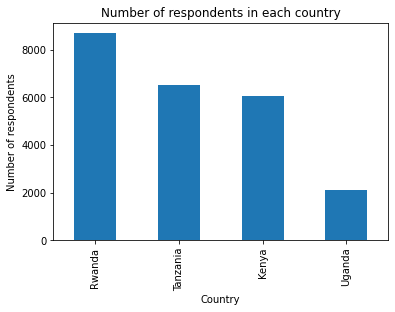

In [ ]:
#Bar chart showing number of respondents across the countries
df['country'].value_counts().plot.bar()
plt.xlabel("Country")
plt.ylabel("Number of respondents")
plt.title("Number of respondents in each country")
plt.show()


The bar graph above shows the number of respondents in each country. Rwanda has the highest number of respondents.

*Analysis of respondents' age across the countries*

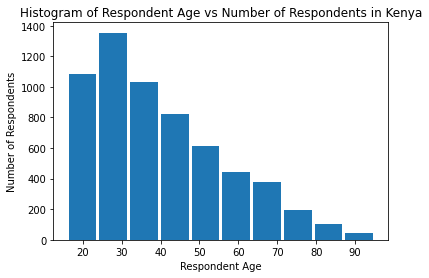

In [ ]:
#Histogram of respondent age in Kenya
kenya_respondentage=df_kenya['respondent_age']
plt.hist(kenya_respondentage, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Respondent Age')
plt.ylabel('Number of Respondents')
plt.title('Histogram of Respondent Age vs Number of Respondents in Kenya')
plt.show()

The highest number of respondents in Kenya are aged 30 years.

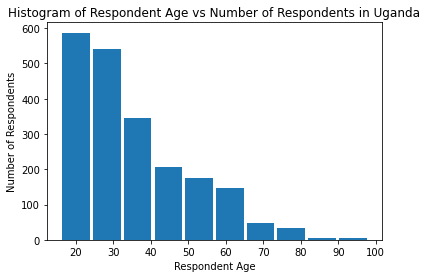

In [ ]:
#Histogram of respondent age in Uganda
uganda_respondentage=df_uganda['respondent_age']
plt.hist(uganda_respondentage, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Respondent Age')
plt.ylabel('Number of Respondents')
plt.title('Histogram of Respondent Age vs Number of Respondents in Uganda')
plt.show()

The highest number of respondents in Uganda are aged 20 years.

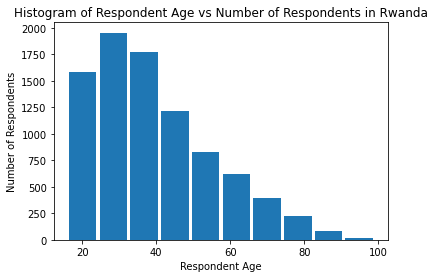

In [ ]:
#Histogram of respondent age in Rwanda
rwanda_respondentage=df_rwanda['respondent_age']
plt.hist(rwanda_respondentage, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Respondent Age')
plt.ylabel('Number of Respondents')
plt.title('Histogram of Respondent Age vs Number of Respondents in Rwanda')
plt.show()


The highest number of respondents in Rwanda are aged 30 years.

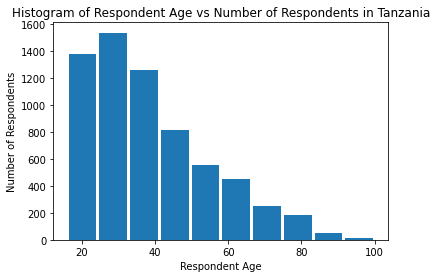

In [ ]:
#Histogram of respondent age in Tanzania
tanzania_respondentage=df_tanzania['respondent_age']
plt.hist(tanzania_respondentage, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Respondent Age')
plt.ylabel('Number of Respondents')
plt.title('Histogram of Respondent Age vs Number of Respondents in Tanzania')
plt.show()


The highest number of respondents in Tanzania are aged 30 years.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


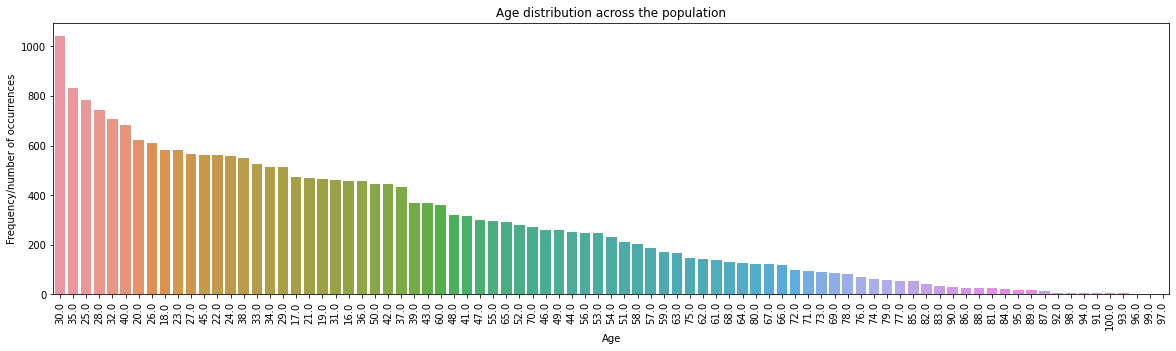

In [ ]:
#Seaborn countplot showing the age distribution across the population
# plot age distribution of the respondents
# specify size of the figure since the values are so many-makes it easier to read the chart
plt.figure(figsize=(20,5))

ax = sns.countplot(df['respondent_age'], order = df['respondent_age'].value_counts().index)
# formatting and labelling the chart
plt.xticks(rotation = 90)
plt.title("Age distribution across the population")
plt.xlabel("Age")
plt.ylabel("Frequency/number of occurrences")
plt.show()

Across the countries, a high number of the respondents are 30 years old.

*Analysis of respondents' gender across the countries*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


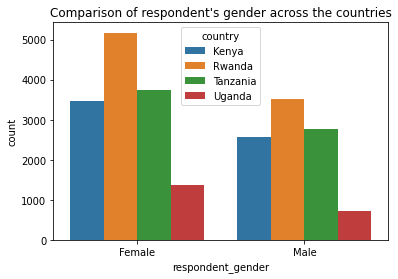

In [ ]:
#Data visualization for respondent gender, Location type, cell phone access and those who have a bank account
import seaborn as sns
#Seaborn countplot of respondent gender across the countries
sns.countplot('respondent_gender', hue= 'country', data=df)
plt.title("Comparison of respondent's gender across the countries")
plt.show()



Across the countries, the female respondents are more than the male respondents. Rwanda has the highest number of male and female respondents followed by Tanzania, Kenya and Uganda respectively.

*Analysis of respondents with a bank account across the countries*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


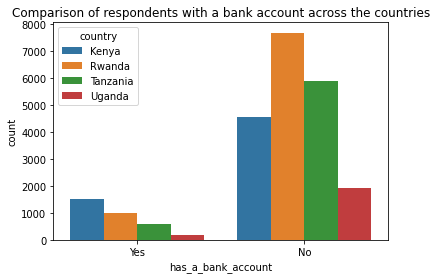

In [ ]:
#Seaborn countplot of having a bank account across the countries
sns.countplot('has_a_bank_account', hue= 'country', data=df)
plt.title("Comparison of respondents with a bank account across the countries")
plt.show()

Across the countries, most respondents do not have a bank account.

*Analysis of location types across the countries*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


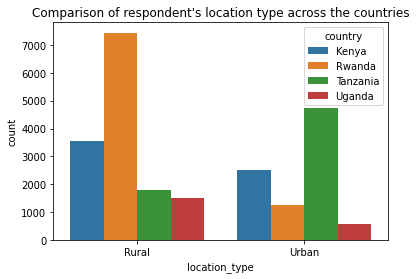

In [ ]:
#Seaborn countplot of location type
sns.countplot('location_type', hue= 'country', data=df)
plt.title("Comparison of respondent's location type across the countries")
plt.show()

In Rwanda, Kenya and Uganda most respondents live in the rural areas as compared to the urban areas. In Tanzania, most people live in the Urban areas as compred to rural areas.

*Analysis of respondents having cell phones across the countries*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


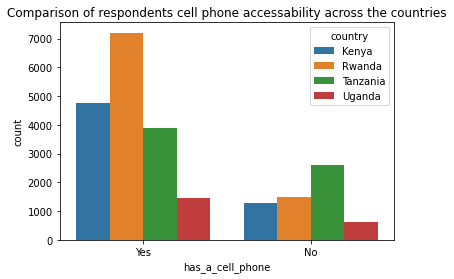

In [ ]:
#Seaborn countplot of having a cell phone
sns.countplot('has_a_cell_phone', hue= 'country', data=df)
plt.title("Comparison of respondents cell phone accessability across the countries")
plt.show()

Across the countries, most people have access to cell phones as compared to those who dont have. Rwanda has the highest number of people with access to cell phones followed by Kenya, Tanzania and Uganda respectively.

*Analysis of household size across the countries*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


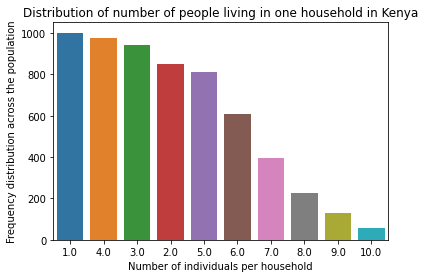

In [ ]:
#Seaborn countplot showing household size in Kenya
ax= sns.countplot(df_kenya['household_size'], order = df_kenya['household_size'].value_counts().head(10).index)
# formatting and labelling chart
plt.title('Distribution of number of people living in one household in Kenya')
plt.xlabel('Number of individuals per household')
plt.ylabel('Frequency distribution across the population')
plt.show()


Most of the respondents household size in Kenya is 1.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


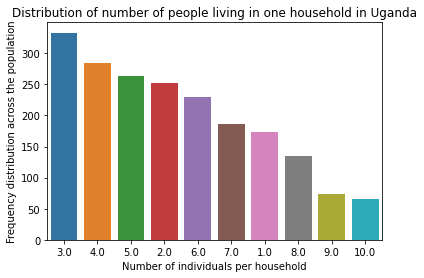

In [ ]:
#Seaborn countplot showing household size in Uganda
x= sns.countplot(df_uganda['household_size'], order = df_uganda['household_size'].value_counts().head(10).index)
# formatting and labelling chart
plt.title('Distribution of number of people living in one household in Uganda')
plt.xlabel('Number of individuals per household')
plt.ylabel('Frequency distribution across the population')
plt.show()


Most of the respondents household size in Uganda is 3.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


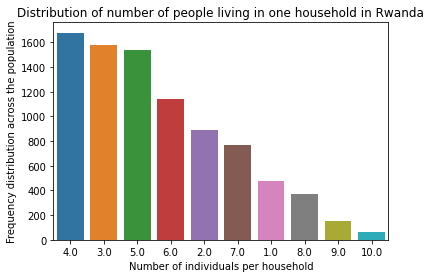

In [ ]:
#Seaborn countplot showing household size in Rwanda
x= sns.countplot(df_rwanda['household_size'], order = df_rwanda['household_size'].value_counts().head(10).index)
# formatting and labelling chart
plt.title('Distribution of number of people living in one household in Rwanda')
plt.xlabel('Number of individuals per household')
plt.ylabel('Frequency distribution across the population')
plt.show()


Most of the respondents household size in Rwanda is 4.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


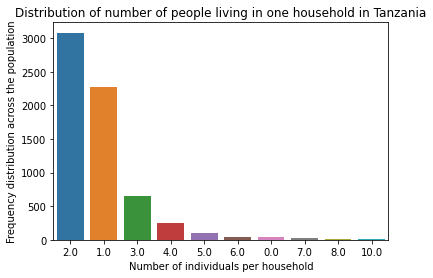

In [ ]:
#Seaborn countplot showing household size in Tanzania
x= sns.countplot(df_tanzania['household_size'], order = df_tanzania['household_size'].value_counts().head(10).index)
# formatting and labelling chart
plt.title('Distribution of number of people living in one household in Tanzania')
plt.xlabel('Number of individuals per household')
plt.ylabel('Frequency distribution across the population')
plt.show()


Most of the respondents household size in Tanzania is 2.

---



*Analysis of respondents' job types across the countries*

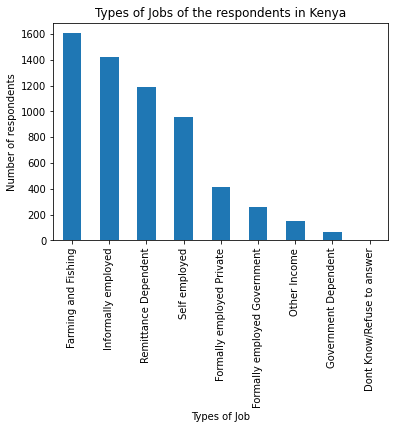

In [ ]:
#Bar chart showing types of the respondents job in Kenya
df_kenya['occupation'].value_counts().plot.bar()
plt.xlabel("Types of Job")
plt.ylabel("Number of respondents")
plt.title("Types of Jobs of the respondents in Kenya")
plt.show()


In Kenya, highest number of the respondents are in the Informal sector as compared to formal sector.

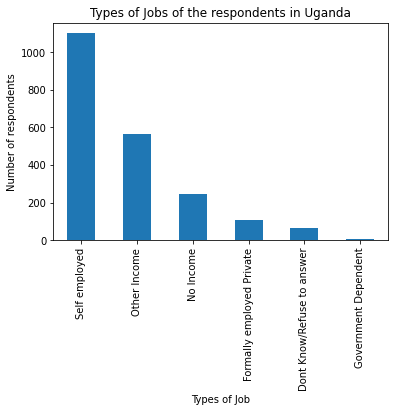

In [ ]:
#Bar chart showings types of job of the respondents in Uganda
df_uganda['occupation'].value_counts().plot.bar()
plt.xlabel("Types of Job")
plt.ylabel("Number of respondents")
plt.title("Types of Jobs of the respondents in Uganda")
plt.show()

In Uganda, highest number of the respondents are Self employed.

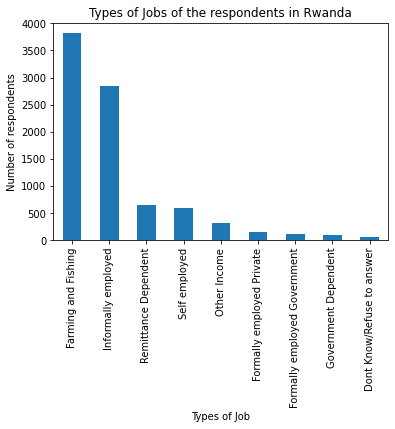

In [ ]:
#Bar chart showing types of job of the respondents in Rwanda
df_rwanda['occupation'].value_counts().plot.bar()
plt.xlabel("Types of Job")
plt.ylabel("Number of respondents")
plt.title("Types of Jobs of the respondents in Rwanda")
plt.show()

In Rwanda, highest number of the respondents are in the Informal sector as compared to formal sector.

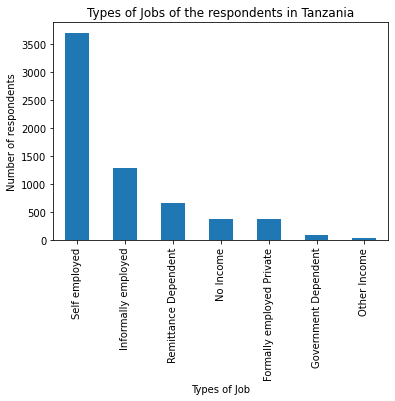

In [ ]:
#Bar chart showing types of job of the respondents in Tanzania
df_tanzania['occupation'].value_counts().plot.bar()
plt.xlabel("Types of Job")
plt.ylabel("Number of respondents")
plt.title("Types of Jobs of the respondents in Tanzania")
plt.show()

In Tanzania, highest number of the respondents are Self employed.

*Analysis of respondents' education level across the countries*

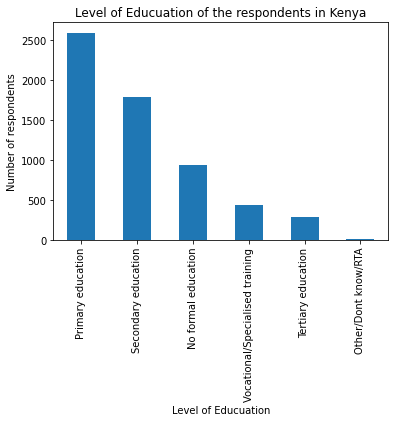

In [ ]:
#Bar chart showing level of education of the respondents in Kenya
df_kenya['education_level'].value_counts().plot.bar()
plt.xlabel("Level of Educuation")
plt.ylabel("Number of respondents")
plt.title("Level of Educuation of the respondents in Kenya")
plt.show()

In Kenya, majority of the respondents' level of education is Primary education.

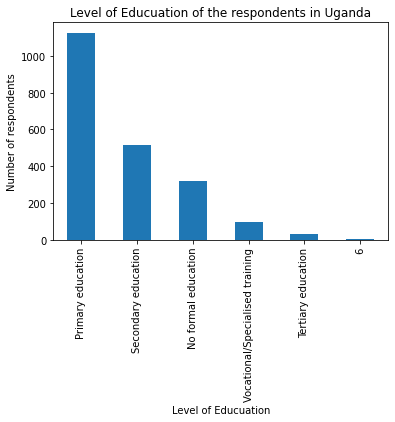

In [ ]:
#Bar chart showing level of education of the respondents in Uganda
df_uganda['education_level'].value_counts().plot.bar()
plt.xlabel("Level of Educuation")
plt.ylabel("Number of respondents")
plt.title("Level of Educuation of the respondents in Uganda")
plt.show()

In Uganda, majority of the respondents' level of education is Primary education.

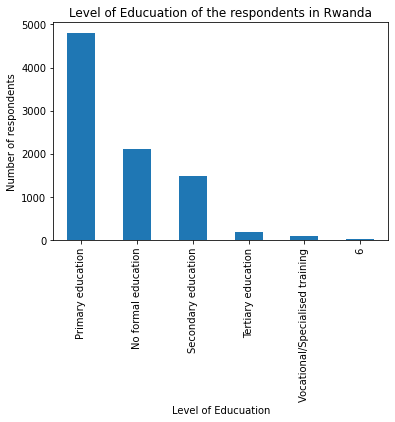

In [ ]:
#Bar chart showing level of education of the respondents in Rwanda
df_rwanda['education_level'].value_counts().plot.bar()
plt.xlabel("Level of Educuation")
plt.ylabel("Number of respondents")
plt.title("Level of Educuation of the respondents in Rwanda")
plt.show()

In Rwanda, majority of the respondents' level of education is Primary education.

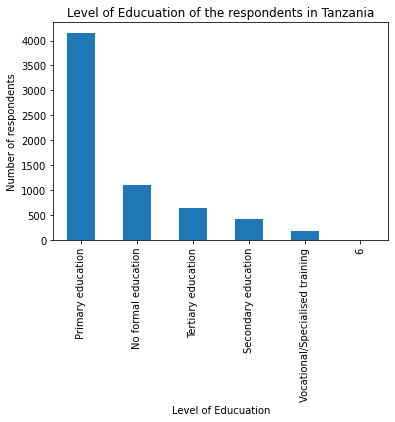

In [ ]:
#Bar chart showing level of education of the respondents in Tanzania
df_tanzania['education_level'].value_counts().plot.bar()
plt.xlabel("Level of Educuation")
plt.ylabel("Number of respondents")
plt.title("Level of Educuation of the respondents in Tanzania")
plt.show()

In Tanzania, majority of the respondents' level of education is Primary education.

*Analysis of respondents' marital status across the countries*

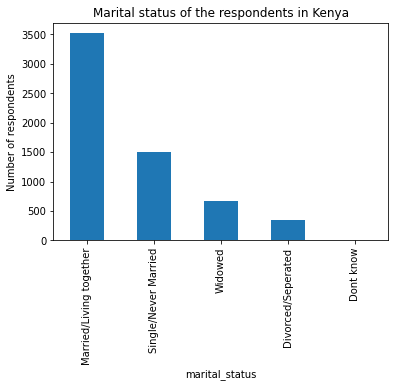

In [ ]:
#Bar chart showing the marital status of the respondents in Kenya
df_kenya.marital_status.value_counts().plot.bar()
plt.xlabel("marital_status")
plt.ylabel("Number of respondents")
plt.title("Marital status of the respondents in Kenya")
plt.show()

In Kenya, most of the respondents are married or living together.

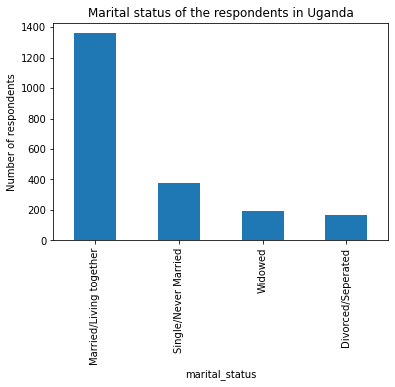

In [ ]:
#Bar chart showing the marital status of the respondents in Uganda
df_uganda.marital_status.value_counts().plot.bar()
plt.xlabel("marital_status")
plt.ylabel("Number of respondents")
plt.title("Marital status of the respondents in Uganda")
plt.show()

In Uganda, most of the respondents are married or living together.

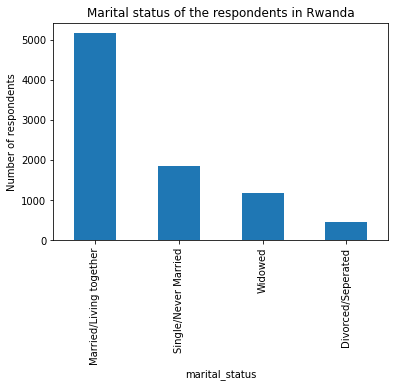

In [ ]:
#Bar chart showing the marital status of the respondents in Rwanda
df_rwanda.marital_status.value_counts().plot.bar()
plt.xlabel("marital_status")
plt.ylabel("Number of respondents")
plt.title("Marital status of the respondents in Rwanda")
plt.show()

In Rwanda, most of the respondents are married or living together.

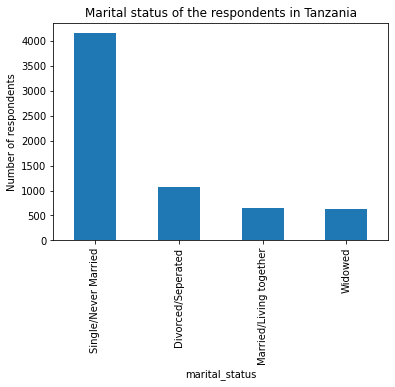

In [ ]:
#Bar chart showing the marital status of the respondents in Tanzania
df_tanzania.marital_status.value_counts().plot.bar()
plt.xlabel("marital_status")
plt.ylabel("Number of respondents")
plt.title("Marital status of the respondents in Tanzania")
plt.show()

In Tanzania, most of the respondents are single or never married.

After univariate analysis, it was found that :

1.  A huge population of the respondents in the four countries did not have or use a bank account.
2.  most individuals live in rural areas
3. the most popular family/household size is 2
4.  a huge number of the respondents are of age 30, while the mean of the ages of all respondents was 39.
5. a large population of the respondents were female.
6. most individuals in the population were married and the next most highest were single individuals
7. most respondents had only studied upto primary level of education. Very few had studied upto the tertiary level.
8. a huge number of the respondent population were self-employed and in informa sector


# **Bivariate Analysis**

*Analysis of those who have a bank account against location type.*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


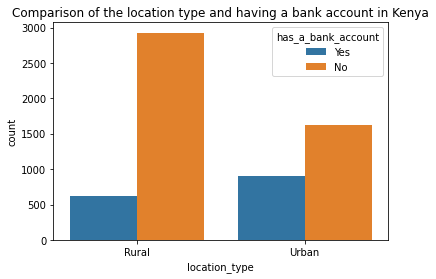

In [ ]:
#Seaborn countplot of location type and has a bank account in Kenya

import seaborn as sns

sns.countplot('location_type', hue= 'has_a_bank_account', data=df_kenya)
plt.title('Comparison of the location type and having a bank account in Kenya')
plt.show()



A high number of respondents in the Rural areas and urban areas do not have a bank account. The number of respondents without a bank account is higher in the rural areas as compared to the urban areas in Kenya.
A higher number of individuals have a bank account in the urban areas as compared to the rural areas.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


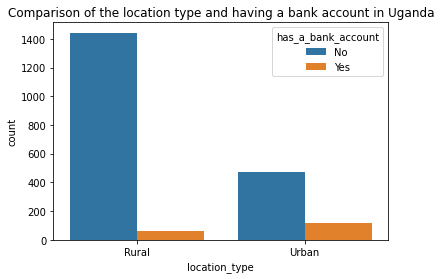

In [ ]:
#Seaborn countplot of location type and has a bank account in Uganda
sns.countplot('location_type', hue= 'has_a_bank_account', data=df_uganda)
plt.title('Comparison of the location type and having a bank account in Uganda')
plt.show()

A high number of respondents in the Rural areas and urban areas do not have a bank account. The number of respondents without a bank account is higher in the rural areas as compared to the urban areas in Uganda.
A higher number of individuals have a bank account in the urban areas as compared to the rural areas.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


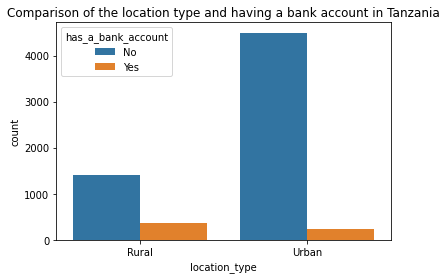

In [ ]:
#Seaborn countplot of location type and has a bank account in Tanzania
sns.countplot('location_type', hue= 'has_a_bank_account', data=df_tanzania)
plt.title('Comparison of the location type and having a bank account in Tanzania')
plt.show()

A high number of respondents in the Rural areas and urban areas do not have a bank account. The number of respondents without a bank account is higher in the urban areas as compared to the rural areas in Tanzania. A higher number of individuals have a bank account in the rural areas as compared to the urban areas.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


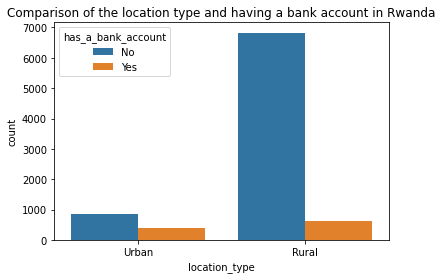

In [ ]:
#Seaborn countplot of location type and has a bank account in Rwanda
sns.countplot('location_type', hue= 'has_a_bank_account', data=df_rwanda)
plt.title('Comparison of the location type and having a bank account in Rwanda')
plt.show()

A higher number of respondents in the Rural areas and urban areas do not have a bank account. The number of respondents with a bank account is higher in the rural areas as compared to the urban areas in Rwanda.

*Analysis of those who have a bank account against respondent gender.*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


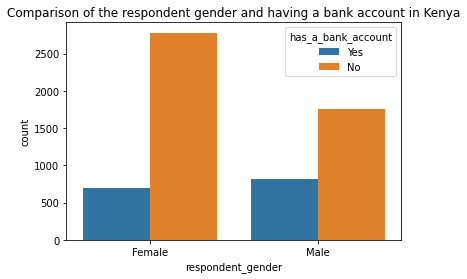

In [ ]:
#Seaborn countplot of respondent gender and has a bank account in Kenya
sns.countplot('respondent_gender', hue= 'has_a_bank_account', data=df_kenya)
plt.title('Comparison of the respondent gender and having a bank account in Kenya')
plt.show()

In Kenya, most female and male respondents do not have a bank account. The number of female respondents without a bank account is higher compared to the number of male respondents.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


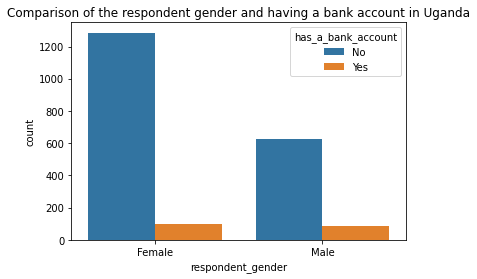

In [ ]:
#Seaborn countplot of respondent gender and has a bank account in Uganda
sns.countplot('respondent_gender', hue= 'has_a_bank_account', data=df_uganda)
plt.title('Comparison of the respondent gender and having a bank account in Uganda')
plt.show()

In Uganda, most female and male respondents do not have a bank account. The number of female respondents without a bank account is higher compared to the number of male respondents.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


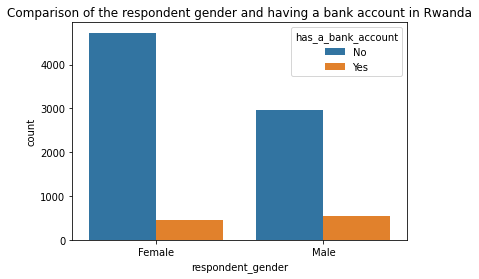

In [ ]:
#Seaborn countplot of respondent gender and has a bank account in Rwanda
sns.countplot('respondent_gender', hue= 'has_a_bank_account', data=df_rwanda)
plt.title('Comparison of the respondent gender and having a bank account in Rwanda')
plt.show()

In Rwanda, most female and male respondents do not have a bank account. The number of female respondents without a bank account is higher compared to the number of male respondents.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


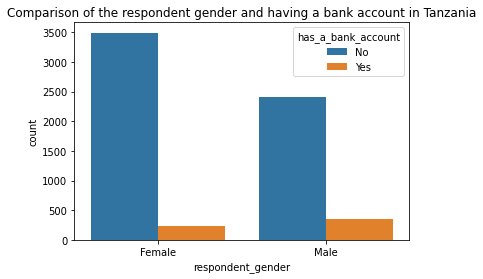

In [ ]:
#Seaborn countplot of respondent gender and has a bank account in Tanzania
sns.countplot('respondent_gender', hue= 'has_a_bank_account', data=df_tanzania)
plt.title('Comparison of the respondent gender and having a bank account in Tanzania')
plt.show()

In Tanzania, most female and male respondents do not have a bank account. The number of female respondents without a bank account is higher compared to the number of male respondents.

*Analysis of having a bank account against having a cell phone.*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


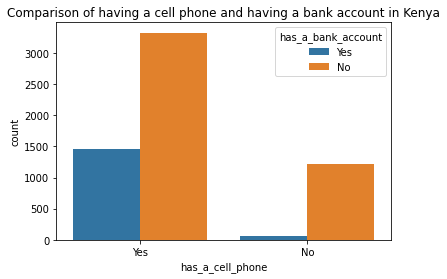

In [ ]:
#Seaborn countplot of having a cell phone and having a bank account in Kenya
sns.countplot('has_a_cell_phone', hue= 'has_a_bank_account', data=df_kenya)
plt.title('Comparison of having a cell phone and having a bank account in Kenya')
plt.show()

In Kenya, a high number of respondents who have cell phones do not have a bank account.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


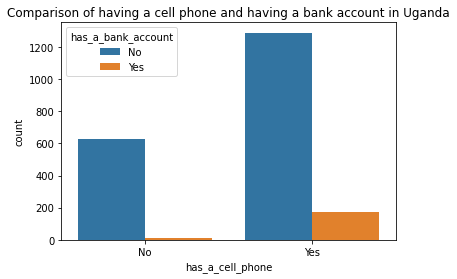

In [ ]:
#Seaborn countplot of having a cell phone and having a bank account in Uganda
sns.countplot('has_a_cell_phone', hue= 'has_a_bank_account', data=df_uganda)
plt.title('Comparison of having a cell phone and having a bank account in Uganda')
plt.show()

In Uganda, a high number of respondents who have cell phones do not have a bank account.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


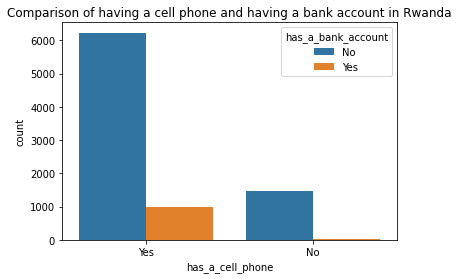

In [ ]:
#Seaborn countplot of having a cell phone and having a bank account in Rwanda
sns.countplot('has_a_cell_phone', hue= 'has_a_bank_account', data=df_rwanda)
plt.title('Comparison of having a cell phone and having a bank account in Rwanda')
plt.show()

In Rwanda, a high number of respondents who have cell phones do not have a bank account.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


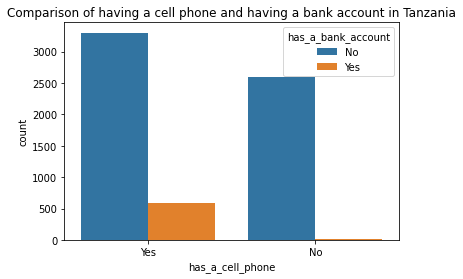

In [ ]:
#Seaborn countplot of having a cell phone and having a bank account in Tanzania
sns.countplot('has_a_cell_phone', hue= 'has_a_bank_account', data=df_tanzania)
plt.title('Comparison of having a cell phone and having a bank account in Tanzania')
plt.show()

In Tanzania, a high number of respondents who have cell phones do not have a bank account.

*Analysis of Education level, Occupation and Marital status against having a bank account.*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


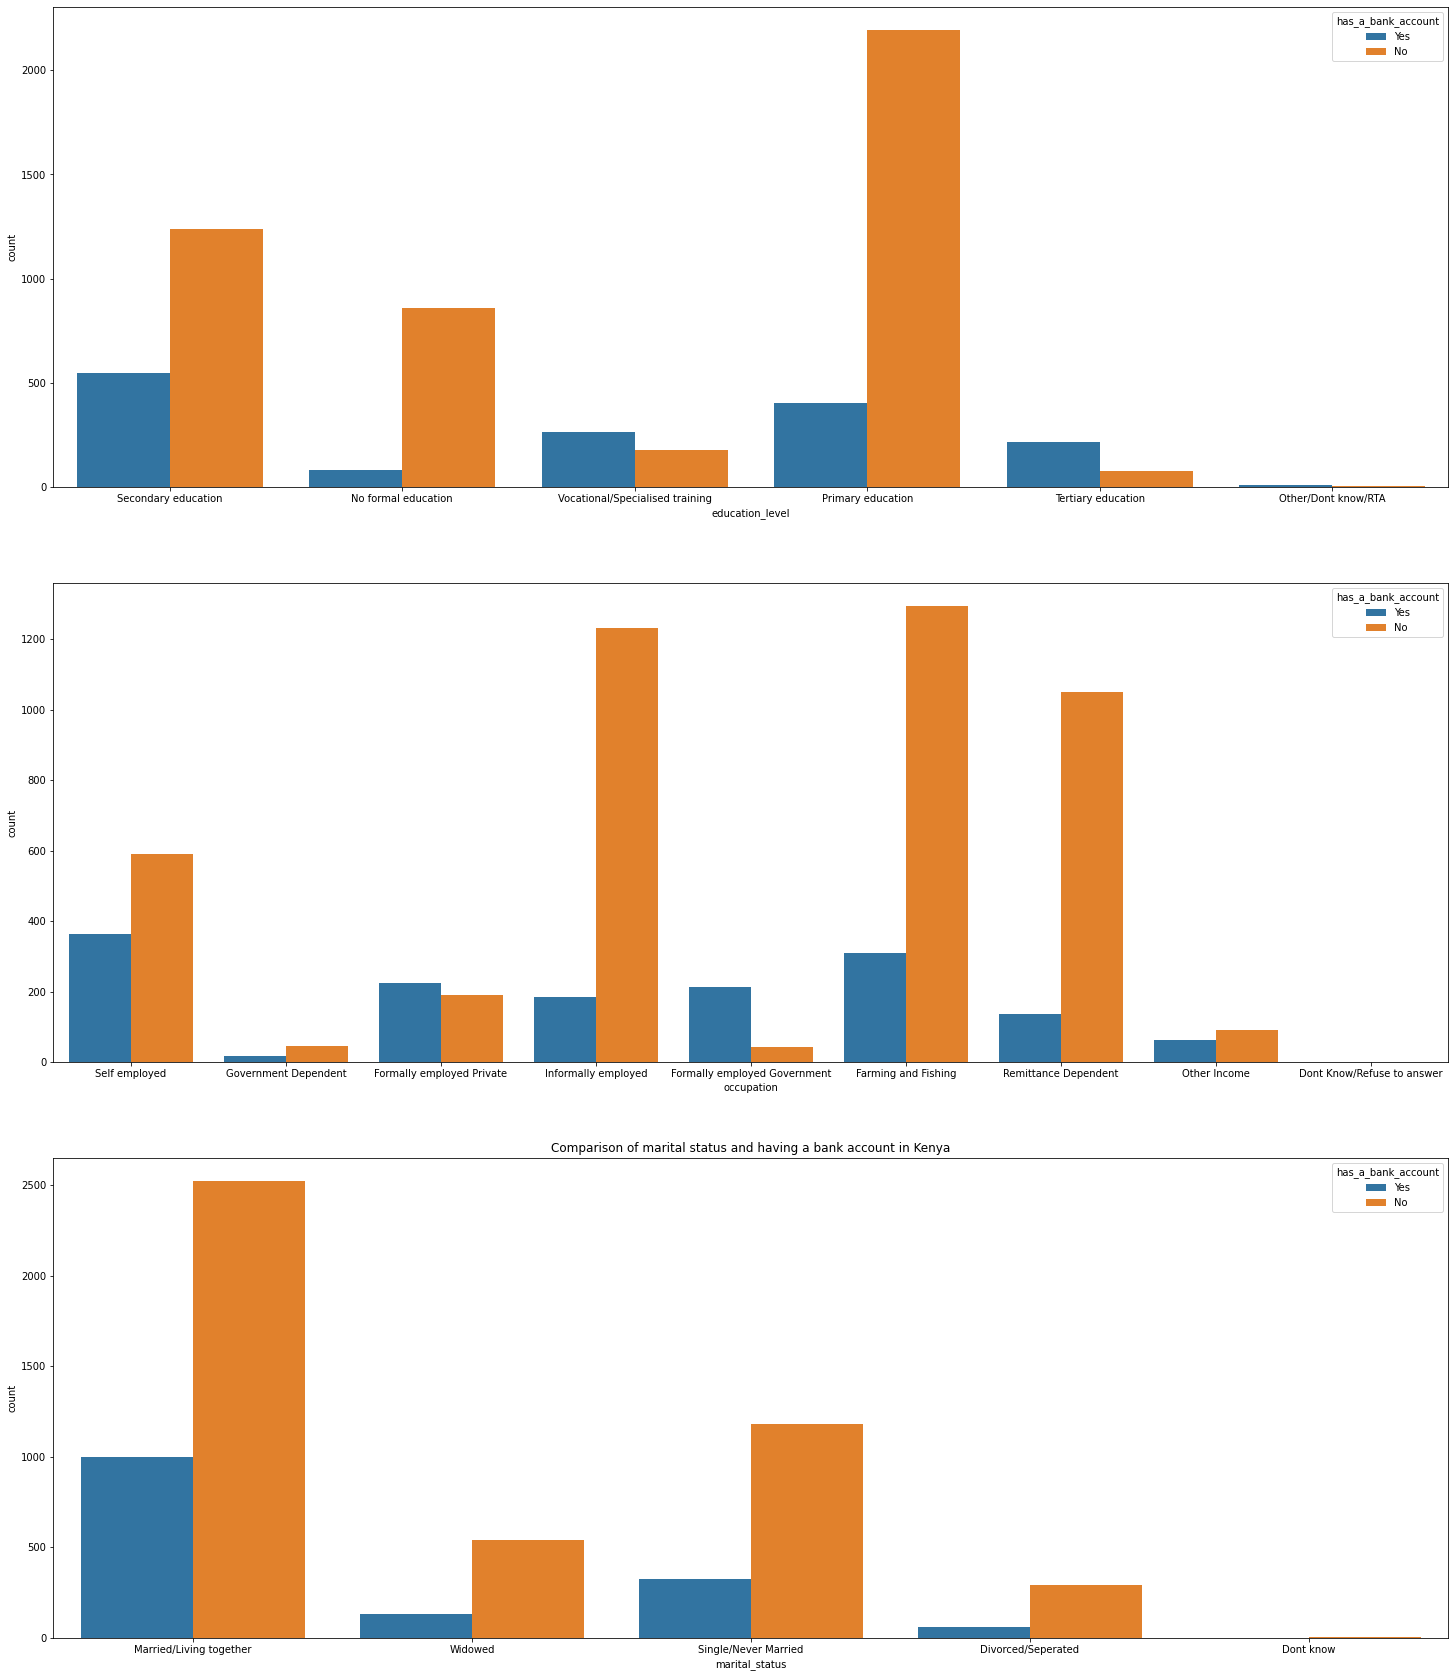

In [ ]:
#Seaborn countplot of education level, occupation, marital status against having a bank account in Kenya
f, axes = plt.subplots(3, 1, figsize=[25, 30])

sns.countplot('education_level', hue= 'has_a_bank_account', data=df_kenya, ax=axes[0])
plt.title('Comparison of education level and having a bank account in Kenya')
sns.countplot('occupation', hue= 'has_a_bank_account', data=df_kenya, ax=axes[1])
plt.title('Comparison of occupation and having a bank account in Kenya')
sns.countplot('marital_status', hue= 'has_a_bank_account', data=df_kenya, ax=axes[2])
plt.title('Comparison of marital status and having a bank account in Kenya')
plt.show()

In Kenya, respondents who have attained Primary education are the highest in terms of not having bank accounts. Also the informal sector has the highest number of respondents without a bank account. Those married and living together are the highest in terms of not having a bank account.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


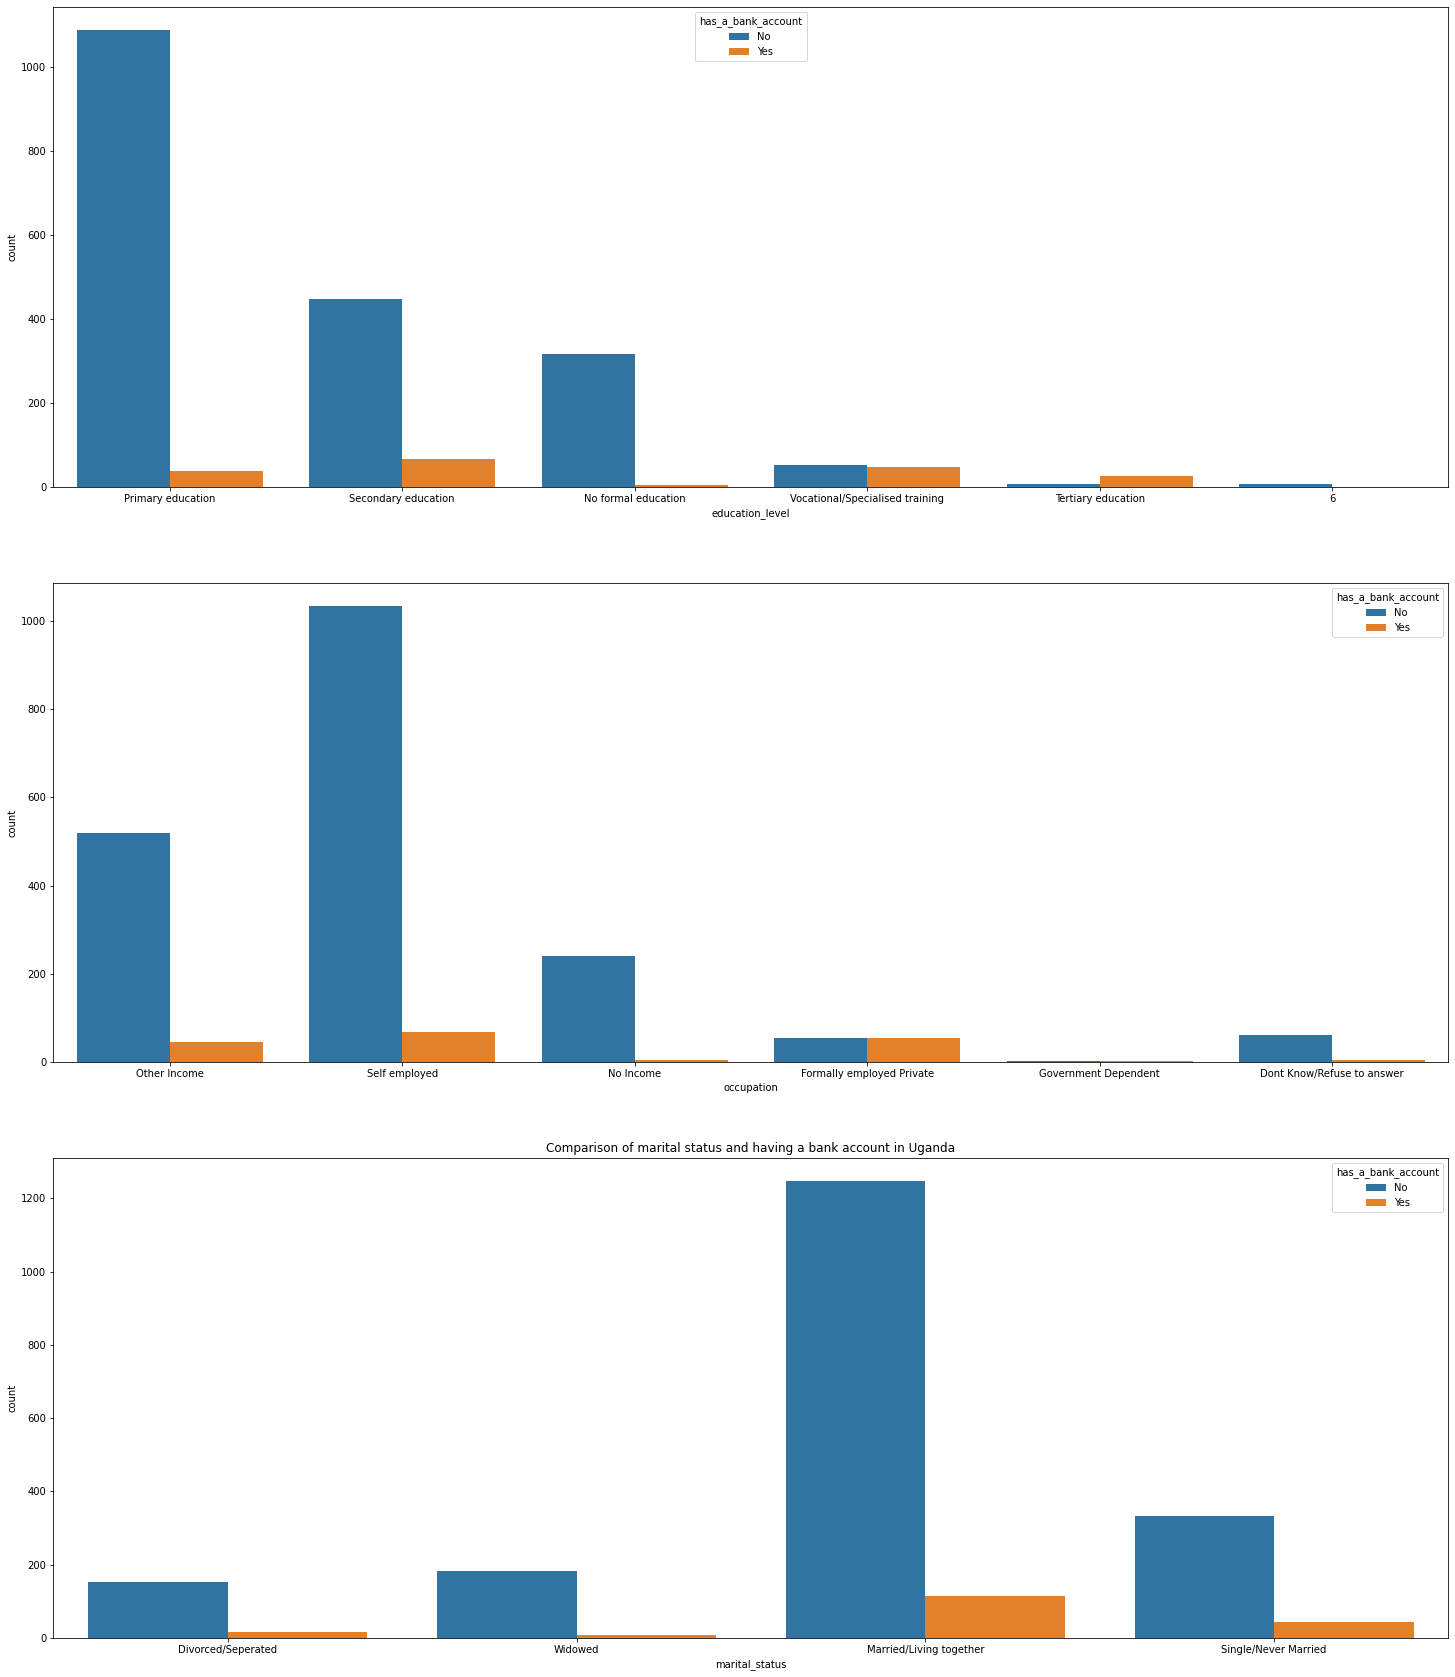

In [ ]:
#Seaborn countplot of education level, occupation, marital status against having a bank account in Uganda
f, axes = plt.subplots(3, 1, figsize=[25, 30])

sns.countplot('education_level', hue= 'has_a_bank_account', data=df_uganda, ax=axes[0])
plt.title('Comparison of education level and having a bank account in Uganda')
sns.countplot('occupation', hue= 'has_a_bank_account', data=df_uganda, ax=axes[1])
plt.title('Comparison of occupation and having a bank account in Uganda')
sns.countplot('marital_status', hue= 'has_a_bank_account', data=df_uganda, ax=axes[2])
plt.title('Comparison of marital status and having a bank account in Uganda')
plt.show()

In Uganda, respondents who have attained Primary education are the highest in terms of not having bank accounts. Also those who are self employed are the highest in terms of not having a bnk account. Those married and living together are the highest in terms of not having a bank account.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


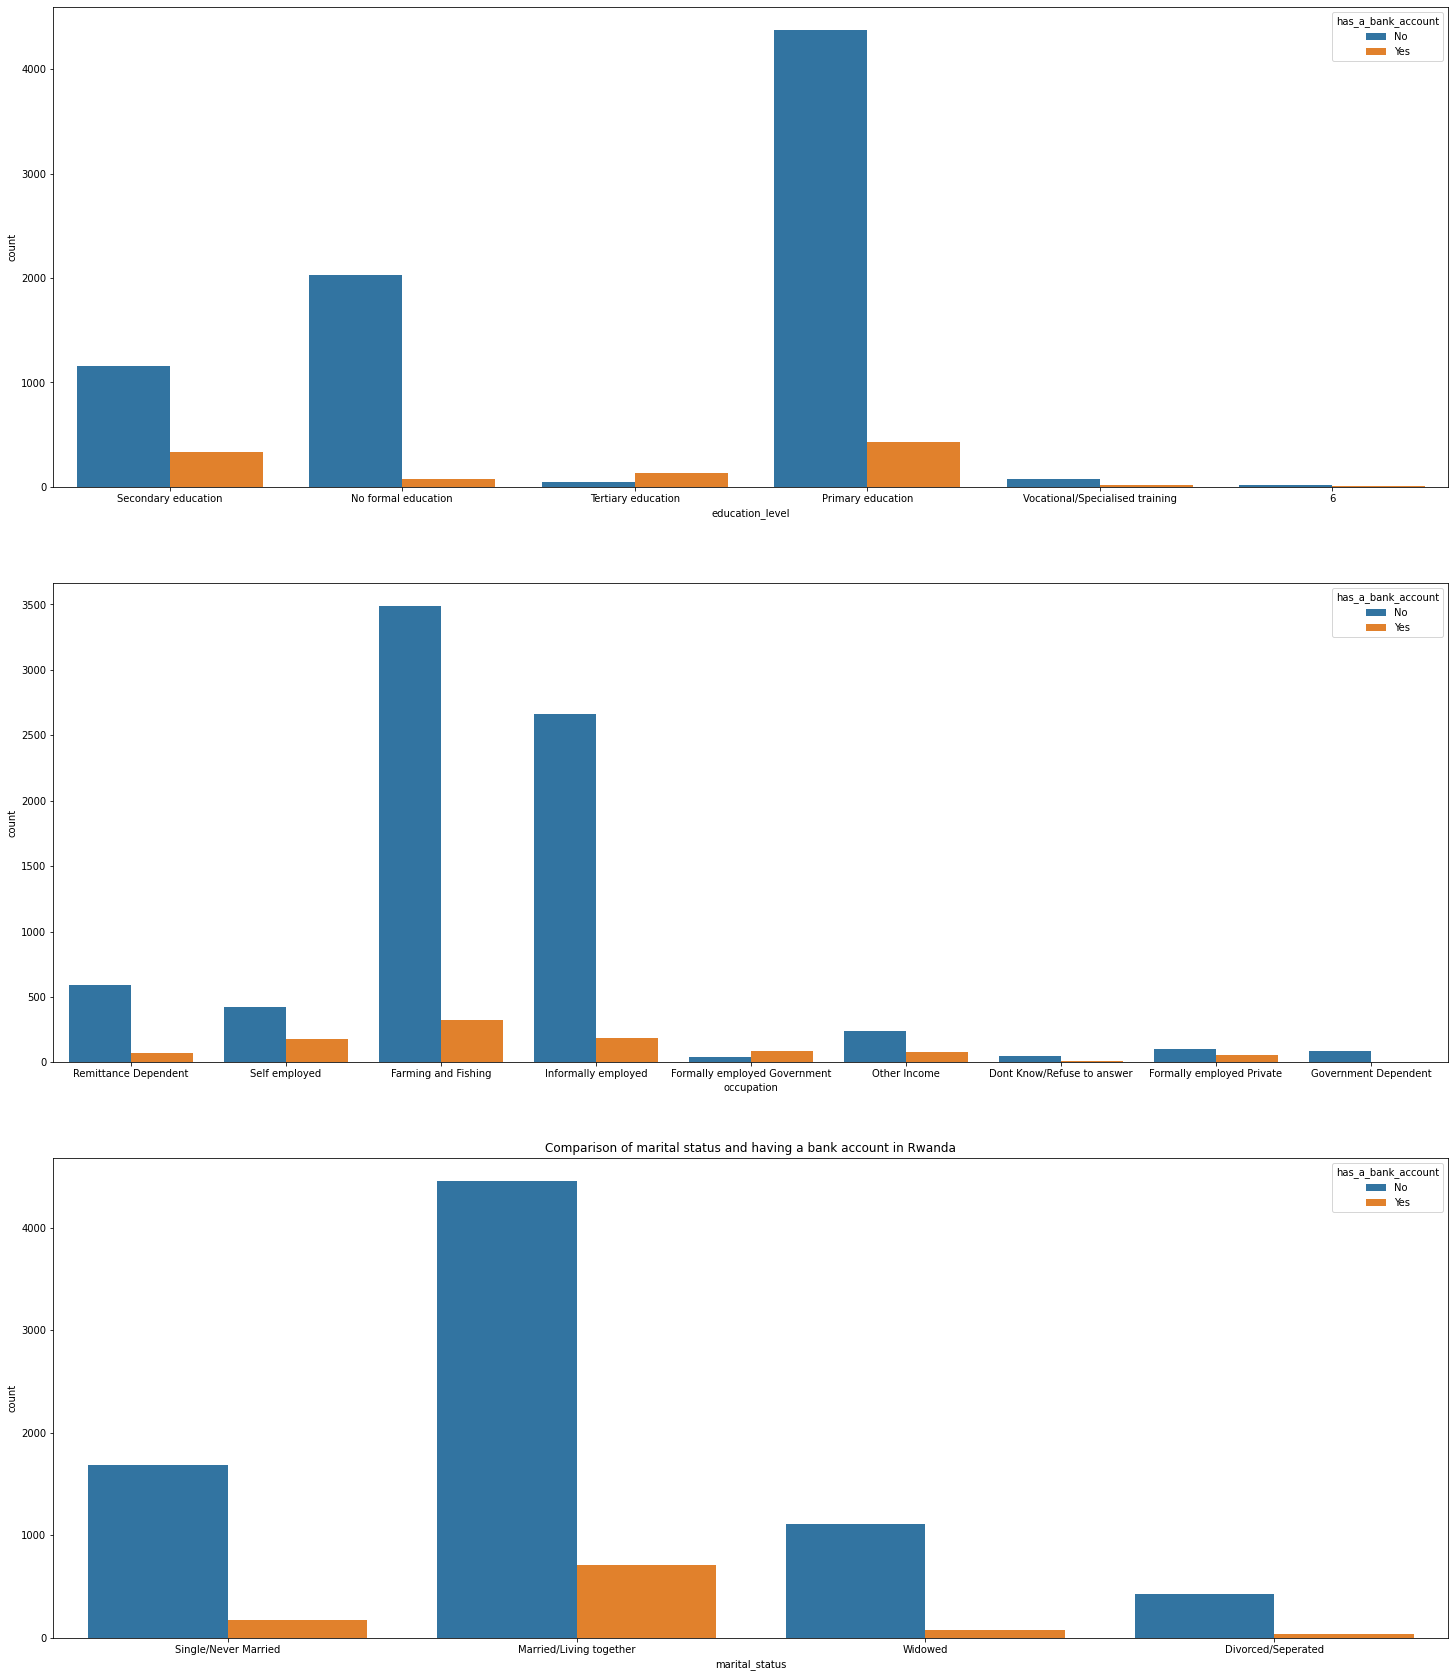

In [ ]:
#Seaborn countplot of education level, occupation, marital status against having a bank account in Rwanda
f, axes = plt.subplots(3, 1, figsize=[25, 30])

sns.countplot('education_level', hue= 'has_a_bank_account', data=df_rwanda, ax=axes[0])
plt.title('Comparison of education level and having a bank account in Rwanda')
sns.countplot('occupation', hue= 'has_a_bank_account', data=df_rwanda, ax=axes[1])
plt.title('Comparison of occupation and having a bank account in Rwanda')
sns.countplot('marital_status', hue= 'has_a_bank_account', data=df_rwanda, ax=axes[2])
plt.title('Comparison of marital status and having a bank account in Rwanda')
plt.show()

In Rwanda, respondents who have attained Primary education are the highest in terms of not having bank accounts. Also the informal sector has the highest number of respondents without a bank account. Those married and living together are the highest in terms of not having a bank account.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


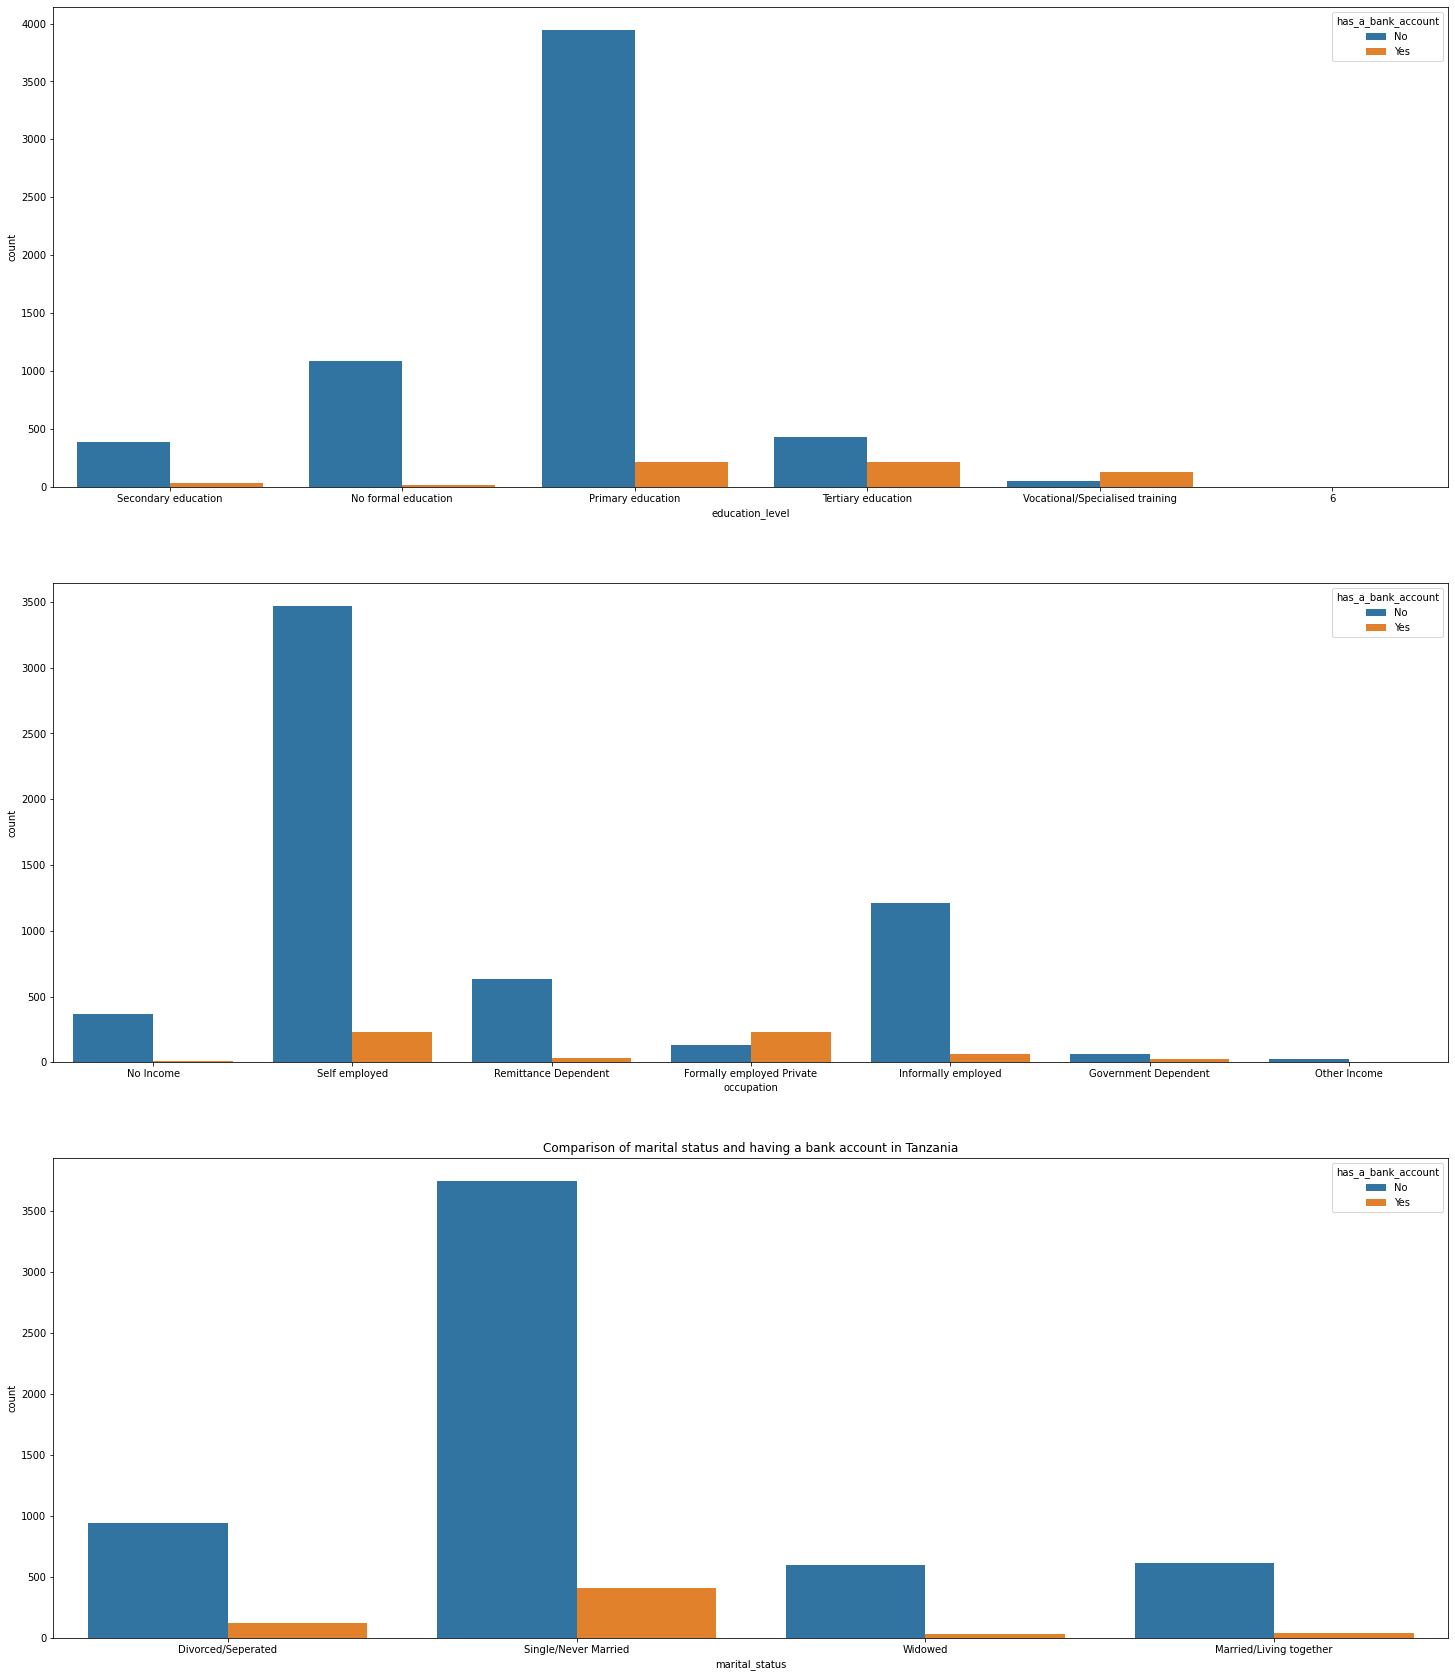

In [ ]:
#Seaborn countplot of education level, occupation, marital status against having a bank account in Tanzania
f, axes = plt.subplots(3, 1, figsize=[25, 30])

sns.countplot('education_level', hue= 'has_a_bank_account', data=df_tanzania, ax=axes[0])
plt.title('Comparison of education level and having a bank account in Tanzania')
sns.countplot('occupation', hue= 'has_a_bank_account', data=df_tanzania, ax=axes[1])
plt.title('Comparison of occupation and having a bank account in Tanzania')
sns.countplot('marital_status', hue= 'has_a_bank_account', data=df_tanzania, ax=axes[2])
plt.title('Comparison of marital status and having a bank account in Tanzania')
plt.show()

In Tanzania, respondents who have attained Primary education are the highest in terms of not having bank accounts. Also the self employed have the highest number in terms of not having a bank account. Those single and never married are the highest in terms of not having a bank account.

**Conclusion**
After bivariate analysis by country, it was found that:

1.  Rwanda recorded a huge number of individuals without a bank account. Kenya however, recorded a relatively high number of individuals possessing a bank account.
2.   the distribution of accessibility to cell phone was fairly distributed across the countries with Tanzania having a relatively huge population with no access to a cell phone
3. most respondents from Tanzania reside in urban areas, while in Rwanda a huge population live in rural areas
4. in Tanzania, most respondents live in household sizes of 1 or 2 people
most respondents in Kenya, Rwanda and Uganda are married while in Uganda, a huge population are single/never married
5. a huge population of the respondents from Kenya and Rwanda do farming and fishing as their income source, while in Uganda and Tanzania,a huge population are self-employed




*Checking correlation of Variables*

In [ ]:
# Changing some categorical attributes to numeric so that we can get their correlations to whether a person has a bank account or not


encode = {"has_a_bank_account": {"Yes":1, "No":0}, "respondent_gender": {"Male":1, "Female":0},
          "has_a_cell_phone":{"Yes":1,"No":0}, "location_type": {"Rural":1, "Urban":0},
          "education_level":{"No formal education":0,"Primary education":1, "Secondary education":2,
                              "Vocational/Specialised training":3,"Tertiary education":4, "Other/Dont know/RTA":5},
          "relationship_with_head":{"Head of Household":0, "Child":1, "Parent":2,
                            "Spouse":3, "Other relative":4, "Other non-relatives":5}, 
          "marital_status":{"Married/Living together":0, "Single/Never Married":1, "Divorced/Seperated":2,
                            "Widowed":3, "Dont know":4},
          "occupation":{"Self employed":0, "Government Dependent":1, "Formally employed Private":2,
          "Informally employed":4, "Formally employed Government occupation":5, "Fish and Farming":6, "Informally employed":7, "Remittance Dependent":8, "Other income":9, "Don't know/Refuse to answer":10 }}

In [ ]:
df.replace(encode, inplace = True)
df.head()

,country,year,uniqueid,has_a_bank_account,location_type,has_a_cell_phone,household_size,respondent_age,respondent_gender,relationship_with_head,marital_status,education_level,occupation
0,Kenya,2018.0,uniqueid_1,1,1,1,3.0,24.0,0,3,0,2,0
1,Kenya,2018.0,uniqueid_2,0,1,0,5.0,70.0,0,0,3,0,1
2,Kenya,2018.0,uniqueid_3,1,0,1,5.0,26.0,1,4,1,3,0
3,Kenya,2018.0,uniqueid_4,0,1,1,5.0,34.0,0,0,0,1,2
4,Kenya,2018.0,uniqueid_5,0,0,0,8.0,26.0,1,1,1,1,7


In [ ]:
#Correlation between location type and having a bank account
df['location_type'].corr(df['has_a_bank_account'])

-0.08862621883461422

There seems to be a weak correlation between the location type  and the responsdent having a bank account; weak correlation.

In [ ]:
#Correlation between location type and having a bank account
df['has_a_cell_phone'].corr(df['has_a_bank_account'])

0.2095118918266013

There seems to be a weak correlation between access to cellphones and the responsdent having a bank account; strong correlation.

In [ ]:
#Correlation between household size and having a bank account
df['household_size'].corr(df['has_a_bank_account'])

-0.02305563551779525

There seems to be a weak correlation between household size and the responsdent having a bank account; weak correlation.



In [ ]:
#Correlation between respondent gender and having a bank account
df['respondent_gender'].corr(df['has_a_bank_account'])

0.11605756558778188

There seems to be a weak correlation between access to gender and having a bank account; strong correlation.

In [ ]:
#Correlation between respondent age and having a bank account
df['respondent_age'].corr(df['has_a_bank_account'])

0.019601315905266665

There seems to be a weak correlation between respondent's age and having a bank account; strong correlation.

In [ ]:
#Correlation between marital status and having a bank account
df['marital_status'].corr(df['has_a_bank_account'])

-0.08357927030620185

There seems to be a weak correlation coefficient between the marital status and the responsdent having a bank account; weak correlation.

# **Multivariate Analysis**



We will perform Principal Component Analysis (PCA).

In [ ]:
# Checking information of our data set
df.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23340 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23340 non-null  object 
 1   year                    23340 non-null  float64
 2   uniqueid                23340 non-null  object 
 3   has_a_bank_account      23340 non-null  int64  
 4   location_type           23340 non-null  int64  
 5   has_a_cell_phone        23340 non-null  int64  
 6   household_size          23340 non-null  float64
 7   respondent_age          23340 non-null  float64
 8   respondent_gender       23340 non-null  int64  
 9   relationship_with_head  23340 non-null  int64  
 10  marital_status          23340 non-null  int64  
 11  education_level         23340 non-null  object 
 12  occupation              23340 non-null  object 
dtypes: float64(3), int64(6), object(4)
memory usage: 3.0+ MB


In [ ]:
# Convert the following labels from integer to float
df['has_a_bank_account'] = df['has_a_bank_account'].astype(str).astype(float)
df['location_type'] = df['location_type'].astype(str).astype(float)
df['has_a_cell_phone'] = df['has_a_cell_phone'].astype(str).astype(float)
df['respondent_gender'] = df['respondent_gender'].astype(str).astype(float)
df['marital_status'] = df['marital_status'].astype(str).astype(float)
df['education_level'] = df['education_level'].astype(str).astype(float)
float_array = df[['household_size', 'respondent_age']].values.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23340 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23340 non-null  object 
 1   year                    23340 non-null  float64
 2   uniqueid                23340 non-null  object 
 3   has_a_bank_account      23340 non-null  float64
 4   location_type           23340 non-null  float64
 5   has_a_cell_phone        23340 non-null  float64
 6   household_size          23340 non-null  float64
 7   respondent_age          23340 non-null  float64
 8   respondent_gender       23340 non-null  float64
 9   relationship_with_head  23340 non-null  int64  
 10  marital_status          23340 non-null  float64
 11  education_level         23340 non-null  float64
 12  occupation              23340 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.0+ MB


In [ ]:
#Dropping unncessary columns
df.drop(['country','year','uniqueid','relationship_with_head','occupation'],axis=1,inplace=True)


In [ ]:
df.head()

,has_a_bank_account,location_type,has_a_cell_phone,household_size,respondent_age,respondent_gender,marital_status,education_level
0,1.0,1.0,1.0,3.0,24.0,0.0,0.0,2.0
1,0.0,1.0,0.0,5.0,70.0,0.0,3.0,0.0
2,1.0,0.0,1.0,5.0,26.0,1.0,1.0,3.0
3,0.0,1.0,1.0,5.0,34.0,0.0,0.0,1.0
4,0.0,0.0,0.0,8.0,26.0,1.0,1.0,1.0


In [ ]:
#Preprocessing
#Dividing our data into the feature set and the corresponding variables
X = df.drop(['has_a_bank_account'], 1)
y = df['has_a_bank_account']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Splitting the dataset into the Training set and Test set
# we shall define the size of the test data as 20% of entire dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Normalization
# We will perform standard scalar normalization to normalize our feature set
# Performing preprocessing part
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Explained variance ratio
# Finding the Explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.24591033, 0.19531334, 0.14855198, 0.13278091, 0.10392944,
       0.09134682, 0.08216719])

In [ ]:
#The first principal component is responsible for 24.59% variance. 
#The second principal component causes 19.53% variance in the dataset. 
# Collectively we can say that (24.59 + 19.53) 44.12% percent of the classification information contained 
# in the feature set is captured by the first two principal components.

In [ ]:
# Using 1 principal component
#We will use 1 principal component to train our algorithm.
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Step 10: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


In [ ]:
#Using one feature, the random forest algorithm is able to correctly predict an 86.46% accuracy. It will corectly predict 4036 out of 4668 instances.

In [ ]:
#Results with 2 Principal Components
# Now let's try to evaluate classification performance of the random forest algorithm 
# with 2 principal components. 
#We will repeat the above procedure but set n_copmonents to 2
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


In [ ]:
#Using two features, the random forest algorithm is able to correctly predict an 86.46% accuracy. It will corectly predict 4036 out of 4668 instances.

In [ ]:
#Results with 3 Principal Components
# Now let's try to evaluate classification performance of the random forest algorithm 
# with 3 principal components. 
#We will repeat the above procedure but set n_copmonents to 3
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


In [ ]:
#Using three features, the random forest algorithm is able to correctly predict an 86.46% accuracy. It will corectly predict 4036 out of 4668 instances.

# **Recommendations and Conclusion**



*   In Kenya and Uganda, most people have bank accounts in urban areas as compared to rural areas. Banks should consider expanding to the rural areas. In Rwanda and Tanzania, most people have bank accounts in the rural areas as compared to urban areas. Banks should also consider expanding in the urban areas.
*   Most of the population across the countries have cell phones but do not have accounts. Banks should reach out to these individuals and businesses. utilize mobile banking capabilities to reach more people.


*   Gender does not really affect the likelihood of opening an account. There is a slight difference between the number of males and females who have accounts.
*   Those that are self employed and in the informal sector are more likely to have bank accounts.


*   Those that are married and living together are also most likely to have bank accounts.






